In [4]:
import ROOT
import healpy as hp

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.legend import Legend
import array
from math import sqrt, fabs, sin, exp, log10
from ROOT import TFile, TTree, TChain, TBranch, TH1D, TH1I, TH1F, TH2F, Math
from ROOT import TLorentzVector
from ROOT.Math import LorentzVector, VectorUtil

In [6]:
lmax = 150
ls = np.array(range(1,lmax+1))
print(ls)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


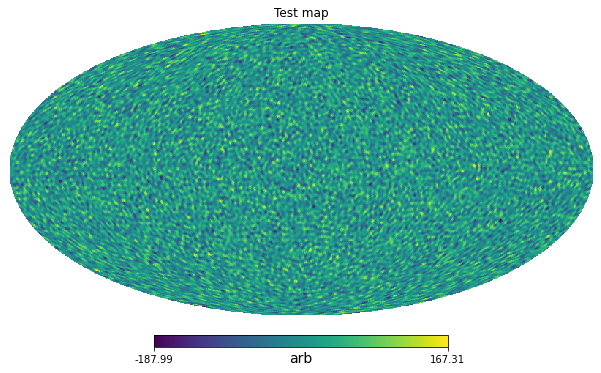

In [7]:
cl_test = np.ones(lmax)
cl_maps = np.concatenate((cl_test, [0]))
cl_maps = np.roll(cl_maps, 1)

nside = 128
nside_coarse = 4
maps = hp.sphtfunc.synfast(cl_maps, nside=nside, lmax=None, pol=False)
hp.mollview(maps, title=r'Test map', unit=r'arb')
cls_hp = hp.sphtfunc.anafast(maps)

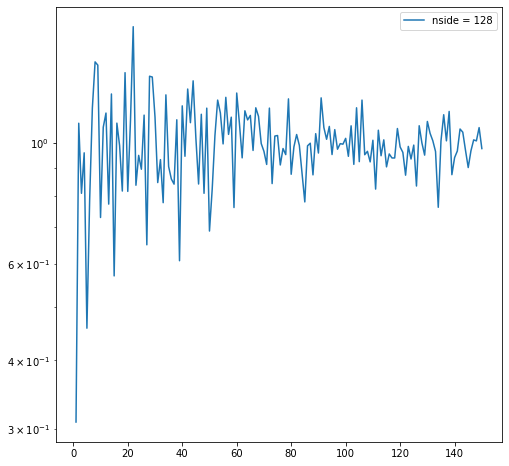

In [8]:
plt.figure(figsize=(8,8))
np.random.seed(5)

plt.semilogy(ls,cls_hp[ls],label='nside = {}'.format(nside))
plt.legend()

0.0 180.0 -180.0 180.0


196608
98240
[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


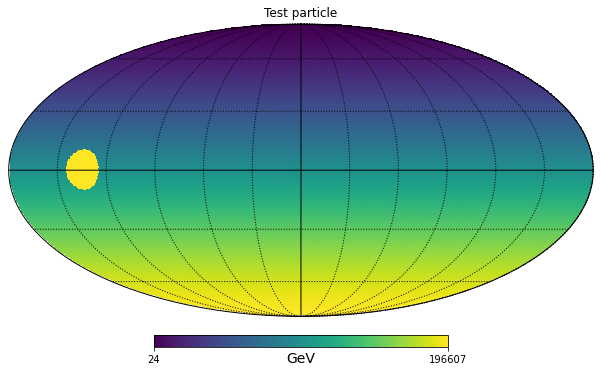

In [9]:
NPIX = hp.nside2npix(nside)
print(NPIX)
ipix = hp.ang2pix(nside, np.pi/2, np.pi*3/4) # nside, theta, phi in radians and RING pixel ordering
print(ipix)
vec = hp.ang2vec(np.pi/2, np.pi*3/4)
print(vec)
ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(10)) # all pixels within 10 degrees of vector
m = np.arange(NPIX) # top/bottom gradiant map
m[ipix_disc] = m.max() # max value of map
hp.mollview(m, title=r'Test particle', unit=r'GeV')
hp.graticule() # draw grid lines

In [10]:
#tfile = TFile.Open('ntuple.root')
tfile = TFile.Open('ntuple_1k.root')
print(tfile)
tree = tfile.Get("qcdtree")
print(tree)

Name: ntuple_1k.root Title: 
Name: qcdtree Title: qcdtree


In [11]:
branches = tree.GetListOfBranches()
leaves = tree.GetListOfLeaves()

In [12]:
for lv in leaves:
    lvname = lv.GetName()
    print(lv)

Name: nGenParticles Title: nGenParticles
Name: genStatus Title: genStatus[nGenParticles]
Name: genPdgId Title: genPdgId[nGenParticles]
Name: genM Title: genM[nGenParticles]
Name: genPx Title: genPx[nGenParticles]
Name: genPy Title: genPy[nGenParticles]
Name: genPz Title: genPz[nGenParticles]
Name: nGenJets Title: nGenJets
Name: genJetM Title: genJetM[nGenJets]
Name: genJetPx Title: genJetPx[nGenJets]
Name: genJetPy Title: genJetPy[nGenJets]
Name: genJetPz Title: genJetPz[nGenJets]
Name: nGenJetParticles Title: nGenJetParticles[nGenJets]
Name: genJetParticleMvec Title: genJetParticleMvec
Name: genJetParticlePxvec Title: genJetParticlePxvec
Name: genJetParticlePyvec Title: genJetParticlePyvec
Name: genJetParticlePzvec Title: genJetParticlePzvec


In [13]:
nevt = 1
nentries = tree.GetEntries()
print("Number of events: ",nentries, "  printout every ",nevt)

Number of events:  1000   printout every  1


In [14]:
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev%nevt==0:
        print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        if iev%nevt==0:
            print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        #for ipart in range(tree.nGenJetParticles[ijet]):
            #print(tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        iptot+=tree.nGenJetParticles[ijet]

Processing event:  0
Genjets:  13
52 140.05874599999999 -2740.115736725944 1367.058609737721 603.8113215131506
57 167.604446 2596.803805258931 -1178.9047163842108 -2329.23802721571
54 26.79297 24.98630010922058 -184.16609809425088 387.83842240894046
49 38.227272 136.00252953339782 35.45392101168659 3.113397929018018
41 28.8544 17.6483706051969 -102.50081549399697 -35.350859988501526
29 16.413583 -8.51913591411155 55.41438202402546 400.2312529923488
28 11.324736999999999 -2.670514590151329 38.73899430476151 -18.800519446846412
17 8.639453 -4.76959060093096 -21.516927646290455 -44.82523714784353
13 5.199116 -6.197727946820088 -9.421174012219723 6.638045724079314
13 5.110822 -10.799860792017881 -0.6022161917394936 1437.57181521273
11 3.798015 -5.447129270139584 3.0816375664672244 90.63978336010058
4 2.2745699999999998 3.1918266649890707 -2.301538760099025 -11.61930482973973
7 2.606106 3.1220856755171864 2.109456726534093 17.749001937590943
Processing event:  1
Genjets:  6
91 112.013022999

In [15]:
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev%nevt==0:
        print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        if iev%nevt==0:
            print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = numpy.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            p4jet += p4part
            #print(tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        iptot+=tree.nGenJetParticles[ijet]
        if iev%nevt==0:
            print(" redo:",p4jet.mass(),p4jet.px(),p4jet.py(),p4jet.pz())

Processing event:  0
Genjets:  13
52 140.05874599999999 -2740.115736725944 1367.058609737721 603.8113215131506
 redo: 140.05871037718498 -2740.1155442925738 1367.058811382133 603.8113112853786
57 167.604446 2596.803805258931 -1178.9047163842108 -2329.23802721571
 redo: 167.6043853081789 2596.8037645479785 -1178.9046599124927 -2329.2379330067915
54 26.79297 24.98630010922058 -184.16609809425088 387.83842240894046
 redo: 26.792954598947986 24.9863067103487 -184.16609859652903 387.838423849816
49 38.227272 136.00252953339782 35.45392101168659 3.113397929018018
 redo: 38.22725616977186 136.00253707595928 35.45392293901356 3.113397968107843
41 28.8544 17.6483706051969 -102.50081549399697 -35.350859988501526
 redo: 28.854391109463002 17.64836862906109 -102.50081915850336 -35.35086050871863
29 16.413583 -8.51913591411155 55.41438202402546 400.2312529923488
 redo: 16.413578149130164 -8.519133883594508 55.41438342155132 400.2312070092999
28 11.324736999999999 -2.670514590151329 38.7389943047615

In [16]:
jet_particle_test = []
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev%nevt==0:
        print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        #print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = numpy.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            # p4part are the jet generator particle 4-momenta in the lab frame
            p4jet += p4part
            #print(tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        #print(" redo:",p4jet.mass(),p4jet.px(),p4jet.py(),p4jet.pz())
        cmJet = p4jet.BoostToCM()
        if iev%nevt==0:
            print(" cmJet Boost:",cmJet.x(),cmJet.y(),cmJet.z())
        p4jetcmjet = VectorUtil.boost(p4jet, cmJet)
        if iev%nevt==0:
            print(" cmJet:",p4jetcmjet.mass(),p4jetcmjet.px(),p4jetcmjet.py(),p4jetcmjet.pz())
        p4jetcm = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = numpy.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            p4partcmjet = VectorUtil.boost(p4part, cmJet)
            # p4partcmjet are the jet generator particle 4-momenta in the jet center-of-mass
            p4jetcm += p4partcmjet
            if (iev==0 & ijet==0): # test on 1st jet in 1st event
                jet_particle_test.append(p4partcmjet)
        if iev%nevt==0:
            print(" cmredo:",p4jetcm.mass(),p4jetcm.px(),p4jetcm.py(),p4jetcm.pz())
        iptot+=tree.nGenJetParticles[ijet]

Processing event:  0
Genjets:  13
 cmJet Boost: 0.8770317655902639 -0.4375560021582003 -0.19326254380878927
 cmJet: 140.05871037717978 -7.275957614183426e-12 0.0 1.8189894035458565e-12
 cmredo: 140.0587103771215 -5.3729909410549226e-11 2.380295960335843e-11 1.029615281922247e-11
 cmJet Boost: -0.7045032371418896 0.31983246502054447 0.631913618687551
 cmJet: 167.60438530817333 -7.275957614183426e-12 3.637978807091713e-12 7.275957614183426e-12
 cmredo: 167.60438530822628 -4.381194018687751e-11 1.5821524645964757e-11 3.160112449496211e-11
 cmJet Boost: -0.05798582943126637 0.4273950569820362 -0.9000582980489946
 cmJet: 26.79295459894827 0.0 0.0 -9.094947017729282e-13
 cmredo: 26.79295459895159 -2.0402256273310826e-13 1.3821305211436652e-12 -3.1387670240690113e-12
 cmJet Boost: -0.9335258787773816 -0.24335689082963935 -0.021370465850488535
 cmJet: 38.22725616977189 0.0 -2.842170943040401e-14 0.0
 cmredo: 38.227256169771756 9.786615962070755e-14 -4.649058915617843e-16 2.5478751053409354e-15

0.0 180.0 -180.0 180.0


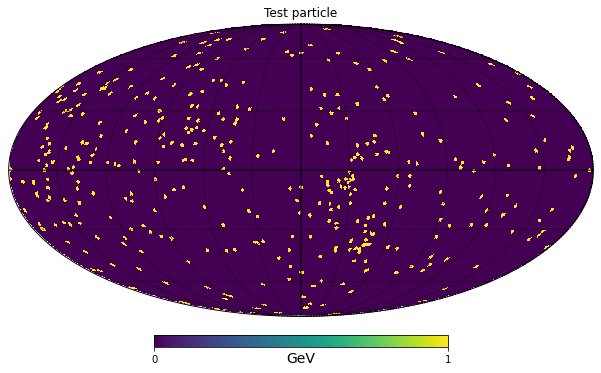

In [17]:
m = np.zeros(NPIX) # blank map
for part in jet_particle_test:
    vec = hp.ang2vec(part.theta(), part.phi())
    ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(1)) # all pixels within 10 degrees of vector
    m[ipix_disc] = 1.0 # part.energy() # energy of particle
hp.mollview(m, title=r'Test particle', unit=r'GeV')
hp.graticule() # draw grid lines